In [1]:
%matplotlib inline
import mglearn
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVR
from sklearn import svm

In [2]:
data=pd.read_excel('cable_text.xlsx','predictSheet')

In [3]:
X=[]
temp=[]
for i in range(len(data)):
    temp=[data.ix[i,'comment']]
    X.append(temp)
X = np.array(X)
y=data['rating']

C:\Users\TH-home\AppData\Local\conda\conda\envs\my_root\lib\site-packages\ipykernel\__main__.py:4: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate_ix


In [4]:
# set auto kernel / C / gamma
clf = svm.SVR()
clf.fit(X, y)
print('R squared score\n',clf.score(X,y))
print('parameter\n',clf.get_params)

R squared score
 0.182611141343
parameter
 <bound method BaseEstimator.get_params of SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='auto',
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)>


In [5]:
# set C : 1000 gamma 0.1
svr_rbf = SVR(kernel='rbf', C=1e3, gamma=0.1)
y_rbf = svr_rbf.fit(X, y).predict(X)

C:\Users\TH-home\AppData\Local\conda\conda\envs\my_root\lib\site-packages\ipykernel\__main__.py:3: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
  app.launch_new_instance()
C:\Users\TH-home\AppData\Local\conda\conda\envs\my_root\lib\site-packages\matplotlib\__init__.py:917: UserWarning: axes.hold is deprecated. Please remove it from your matplotlibrc and/or style files.
  warnings.warn(self.msg_depr_set % key)
C:\Users\TH-home\AppData\Local\conda\conda\envs\my_root\lib\site-packages\matplotlib\rcsetup.py:152: UserWarning: axes.hold is deprecated, will be removed in 3.0
  warnings.warn("axes.hold is deprecated, will be removed in 3.0")


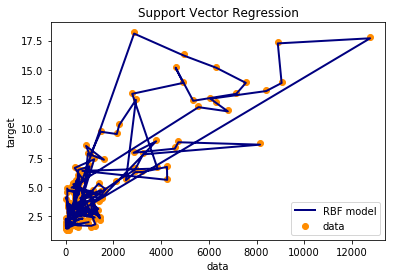

In [6]:
lw = 2
plt.scatter(X, y, color='darkorange', label='data')
plt.hold('on')
plt.plot(X, y_rbf, color='navy', lw=lw, label='RBF model')
plt.xlabel('data')
plt.ylabel('target')
plt.title('Support Vector Regression')
plt.legend()
plt.show()

In [7]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import median_absolute_error
from sklearn.metrics import r2_score
y_pred = svr_rbf.predict(X)
y_true = y
#sum(pred-true)/nsmaples
print("MAE:",mean_absolute_error(y_true, y_pred))
print("MSE:",mean_squared_error(y_true, y_pred))
print("Median error:",median_absolute_error(y_true, y_pred))
print("R squared:",r2_score(y_true, y_pred))

MAE: 0.127854590142
MSE: 0.0508293484868
Median error: 0.10001182629
R squared: 0.996164644176


In [8]:
import time
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import learning_curve
from sklearn.kernel_ridge import KernelRidge

train_size = len(data)
#set kernel
svr = GridSearchCV(SVR(kernel='rbf', gamma=0.1), cv=5,
                   param_grid={"C": [1e0, 1e1, 1e2, 1e3],
                               "gamma": np.logspace(-2, 2, 5)})

kr = GridSearchCV(KernelRidge(kernel='rbf', gamma=0.1), cv=5,
                  param_grid={"alpha": [1e0, 0.1, 1e-2, 1e-3],
                              "gamma": np.logspace(-2, 2, 5)})
#set nums
X_plot = np.linspace(0, 5, 100000)[:, None]

t0 = time.time()
svr.fit(X, y)
svr_fit = time.time() - t0
print("SVR complexity and bandwidth selected and model fitted in %.3f s"
      % svr_fit)

t0 = time.time()
kr.fit(X, y)
kr_fit = time.time() - t0
print("KRR complexity and bandwidth selected and model fitted in %.3f s"
      % kr_fit)


sv_ratio = svr.best_estimator_.support_.shape[0] / train_size
print("Support vector ratio: %.3f" % sv_ratio)

t0 = time.time()
#@param <- test data
y_svr = svr.predict(X)
svr_predict = time.time() - t0
print("SVR prediction for %d inputs in %.3f s"
      % (X_plot.shape[0], svr_predict))

t0 = time.time()
y_kr = kr.predict(X)
kr_predict = time.time() - t0
print("KRR prediction for %d inputs in %.3f s"
      % (X_plot.shape[0], kr_predict))

SVR complexity and bandwidth selected and model fitted in 0.646 s
KRR complexity and bandwidth selected and model fitted in 0.598 s
Support vector ratio: 0.948
SVR prediction for 100000 inputs in 0.002 s
KRR prediction for 100000 inputs in 0.002 s


In [9]:
print(svr.best_estimator_)
print(svr.best_score_)
print(svr.best_params_)
print(svr.best_index_)
print(svr.n_splits_)

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma=0.01,
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)
-0.362551322684
{'C': 1.0, 'gamma': 0.01}
0
5


In [10]:
print(kr.best_estimator_)
print(kr.best_score_)
print(kr.best_params_)
print(kr.best_index_)
print(kr.n_splits_)

KernelRidge(alpha=0.1, coef0=1, degree=3, gamma=0.01, kernel='rbf',
      kernel_params=None)
-2.1533771559
{'alpha': 0.1, 'gamma': 0.01}
5
5


C:\Users\TH-home\AppData\Local\conda\conda\envs\my_root\lib\site-packages\ipykernel\__main__.py:9: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
C:\Users\TH-home\AppData\Local\conda\conda\envs\my_root\lib\site-packages\matplotlib\__init__.py:917: UserWarning: axes.hold is deprecated. Please remove it from your matplotlibrc and/or style files.
  warnings.warn(self.msg_depr_set % key)
C:\Users\TH-home\AppData\Local\conda\conda\envs\my_root\lib\site-packages\matplotlib\rcsetup.py:152: UserWarning: axes.hold is deprecated, will be removed in 3.0
  warnings.warn("axes.hold is deprecated, will be removed in 3.0")


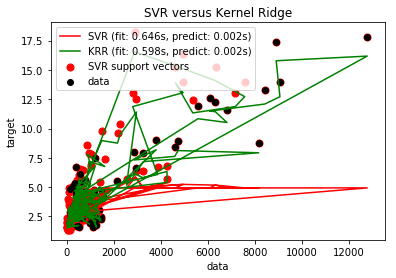

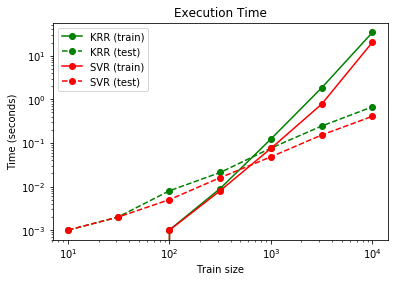

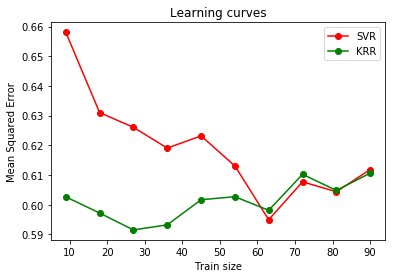

In [11]:
rng = np.random.RandomState(0)

train_X = X
train_y = y

sv_ind = svr.best_estimator_.support_
plt.scatter(train_X[sv_ind], train_y[sv_ind], c='r', s=50, label='SVR support vectors',zorder=2)
plt.scatter(train_X[:100], train_y[:100], c='k', label='data', zorder=2)
plt.hold('on')
plt.plot(train_X, y_svr, c='r',
         label='SVR (fit: %.3fs, predict: %.3fs)' % (svr_fit, svr_predict))
plt.plot(train_X, y_kr, c='g',
         label='KRR (fit: %.3fs, predict: %.3fs)' % (kr_fit, kr_predict))
plt.xlabel('data')
plt.ylabel('target')
plt.title('SVR versus Kernel Ridge')
plt.legend()

# Visualize training and prediction time
plt.figure()

# Generate sample data
X = 3000 * rng.rand(10000, 1)
y = np.sin(X).ravel()
y[::5] += 3 * (0.5 - rng.rand(X.shape[0] // 5))
sizes = np.logspace(1, 4, 7, dtype=np.int)
for name, estimator in {"KRR": KernelRidge(kernel='rbf', alpha=0.1,
                                           gamma=10),
                        "SVR": SVR(kernel='rbf', C=1e1, gamma=10)}.items():
    train_time = []
    test_time = []
    for train_test_size in sizes:
        t0 = time.time()
        estimator.fit(X[:train_test_size], y[:train_test_size])
        train_time.append(time.time() - t0)

        t0 = time.time()
        estimator.predict(X_plot[:1000])
        test_time.append(time.time() - t0)

    plt.plot(sizes, train_time, 'o-', color="r" if name == "SVR" else "g",
             label="%s (train)" % name)
    plt.plot(sizes, test_time, 'o--', color="r" if name == "SVR" else "g",
             label="%s (test)" % name)

plt.xscale("log")
plt.yscale("log")
plt.xlabel("Train size")
plt.ylabel("Time (seconds)")
plt.title('Execution Time')
plt.legend(loc="best")

# Visualize learning curves
plt.figure()

svr = SVR(kernel='rbf', C=1e1, gamma=0.1)
kr = KernelRidge(kernel='rbf', alpha=0.1, gamma=0.1)
train_sizes, train_scores_svr, test_scores_svr = \
    learning_curve(svr, X[:100], y[:100], train_sizes=np.linspace(0.1, 1, 10),
                   scoring="neg_mean_squared_error", cv=10)
train_sizes_abs, train_scores_kr, test_scores_kr = \
    learning_curve(kr, X[:100], y[:100], train_sizes=np.linspace(0.1, 1, 10),
                   scoring="neg_mean_squared_error", cv=10)

plt.plot(train_sizes, -test_scores_svr.mean(1), 'o-', color="r",label="SVR")
plt.plot(train_sizes, -test_scores_kr.mean(1), 'o-', color="g",label="KRR")
plt.xlabel("Train size")
plt.ylabel("Mean Squared Error")
plt.title('Learning curves')
plt.legend(loc="best")

plt.show()

In [13]:
from sklearn.model_selection import cross_val_score
#Returns the coefficient of determination R^2 of the prediction.!!!
svr.fit(train_X,train_y)
print("score : ",svr.score(train_X,train_y))
scores = cross_val_score(svr,train_X,train_y,cv=5)
print("cross validation scores : ",scores)
#The mean score and the 95% confidence interval of the score estimate are hence given by
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

score :  0.98472206339
cross validation scores :  [ 0.01327843 -1.44432244 -0.08165576 -0.67880166 -5.07359008]
Accuracy: -1.45 (+/- 3.77)


In [15]:
from sklearn.model_selection import ShuffleSplit
n_samples = train_X.shape[0]
cv = ShuffleSplit(n_splits=3, test_size=0.3, random_state=0)
cross_val_score(svr, train_X,train_y, cv=cv)

array([ 0.04818022,  0.05631803,  0.13040251])